In [18]:
#Import Stuff
import numpy as np
import pandas as pd
import math
import thinkplot
import thinkstats2
import scipy.stats as ss
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, log_loss
import statsmodels.formula.api as sm2


In [19]:
#Credit Data
dfc = pd.read_csv("credit_risk_dataset.csv")
dfc.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [20]:
#Real Estate
dfre = pd.read_csv("NYC_Real_Estate.csv")
dfre.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h1>Part 1 - Data Preparation: Both Datasets</h1>

For preparation, focus is set on the standard deviation, mean and max values just to see if we have any values or attributes that have extreme outliers. There wasn't anything too alarming but those that have a z-score of over 3 are omitted from the data frame.

In [21]:
#Prep for Real Estate DF
dfre = dfre.dropna()
print(dfre.describe())

dfre = dfre[(np.abs(stats.zscore(dfre['SALE PRICE'])) < 3)]

            BOROUGH         BLOCK           LOT      ZIP CODE  \
count  48248.000000  48248.000000  48248.000000  48248.000000   
mean       3.251554   4984.154535    234.400742  10939.604087   
std        0.903331   3427.528068    496.413133   1072.741157   
min        1.000000      1.000000      1.000000      0.000000   
25%        3.000000   2204.000000     21.000000  10469.000000   
50%        3.000000   4660.000000     45.000000  11217.000000   
75%        4.000000   6996.000000     94.000000  11237.000000   
max        5.000000  16319.000000   9009.000000  11694.000000   

       RESIDENTIAL UNITS   TOTAL UNITS  GROSS SQUARE FEET    YEAR BUILT  \
count       48248.000000  48248.000000       4.824800e+04  48248.000000   
mean            2.569682      2.837755       3.672552e+03   1827.738082   
std            17.468624     20.752771       2.947540e+04    464.418481   
min             0.000000      0.000000       0.000000e+00      0.000000   
25%             1.000000      1.000000 

In [22]:
#Prep for Credit Data
dfc = dfc.dropna()
print(dfc.describe())

dfc = dfc[(np.abs(stats.zscore(dfc['person_income'])) < 3)]
dfc = dfc[(np.abs(stats.zscore(dfc['loan_amnt'])) < 3)]
dfc = dfc[(np.abs(stats.zscore(dfc['person_age'])) < 3)]


         person_age  person_income  person_emp_length     loan_amnt  \
count  28638.000000   2.863800e+04       28638.000000  28638.000000   
mean      27.727216   6.664937e+04           4.788672   9656.493121   
std        6.310441   6.235645e+04           4.154627   6329.683361   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.595600e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28638.000000  28638.000000         28638.000000   
mean       11.039867      0.216600             0.169488   
std         3.229372      0.411935             0.106393   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

<h1>Part 2 - Linear Regression - Real Estate Data: Sales Price</h1>

We can see below that there are no strong correlations between the fields listed in the correlation matrix below so no columns necessarily need to be taken out. 

However, we can see that there are a lot of values listed as 0 for zip code and year, which will most likely impact our model but they'll be converted to categorical values.

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,1.00,0.20,-0.17,0.09,-0.07,-0.06,-0.06,0.15,-0.15
BLOCK,0.20,1.00,-0.14,0.14,-0.04,-0.04,-0.04,0.08,-0.15
LOT,-0.17,-0.14,1.00,-0.07,-0.04,-0.03,-0.04,-0.39,-0.03
ZIP CODE,0.09,0.14,-0.07,1.00,-0.01,-0.01,-0.01,0.31,-0.04
RESIDENTIAL UNITS,-0.07,-0.04,-0.04,-0.01,1.00,0.82,0.67,0.03,0.18
TOTAL UNITS,-0.06,-0.04,-0.03,-0.01,0.82,1.00,0.57,0.03,0.17
GROSS SQUARE FEET,-0.06,-0.04,-0.04,-0.01,0.67,0.57,1.00,0.03,0.15
YEAR BUILT,0.15,0.08,-0.39,0.31,0.03,0.03,0.03,1.00,0.03
SALE PRICE,-0.15,-0.15,-0.03,-0.04,0.18,0.17,0.15,0.03,1.00


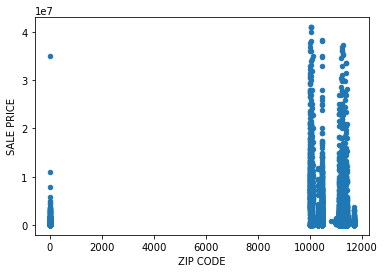

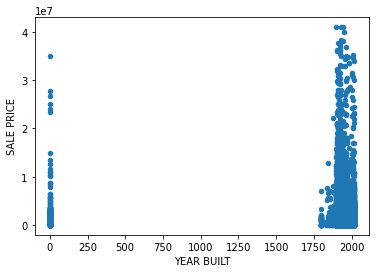

In [23]:
dfre.plot(kind='scatter', x='ZIP CODE', y='SALE PRICE')
dfre.plot(kind='scatter', x='YEAR BUILT', y='SALE PRICE')

corr = dfre.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

In [24]:
#Converting variables to categorical
dfre['ZIP CODE'] = dfre['ZIP CODE'].astype('category')
dfre['BOROUGH'] = dfre['BOROUGH'].astype('category')

In [34]:
#Linear Regression results

dfreGD = pd.get_dummies(dfre, drop_first=True)

dfreX = dfreGD.drop(columns={"SALE PRICE"})
dfreY = dfreGD['SALE PRICE']

x = np.array(dfreX)
y = np.array(dfreY).reshape(-1,1)

x.shape, y.shape

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

model1 = LinearRegression()
model1.fit(xTrain, yTrain)

ypred = model1.predict(xTest)
print("Mean Squared Error:", mean_squared_error(yTest, ypred, squared = False))

X1 = sm.add_constant(xTrain)
est = sm.OLS(yTrain, X1)
est2 = est.fit()
print(est2.summary())

Mean Squared Error: 1635694.1353261122
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     79.32
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:39:04   Log-Likelihood:            -5.2794e+05
No. Observations:               33695   AIC:                         1.057e+06
Df Residuals:                   33360   BIC:                         1.059e+06
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1

<h1>Part 3 - Logistic Regression - Credit Data: Loan Status</h1>

In [26]:
#Basline Accuracy
bAcc = 1 - dfc["loan_status"].mean()
round(bAcc,2)

0.78

In [27]:
test1, train1 = train_test_split(dfc,test_size=0.3)

In [28]:
#Define Formula
form = "loan_status ~ person_age+person_income+person_home_ownership+person_emp_length+loan_intent+loan_amnt+loan_int_rate+cb_person_default_on_file"
model = sm2.logit(data=train1, formula=form).fit()

preds1 = model.predict(test1)
model.summary()

Optimization terminated successfully.
         Current function value: 0.378995
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 8310
Model:                          Logit   Df Residuals:                     8295
Method:                           MLE   Df Model:                           14
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:                  0.2680
Time:                        14:38:27   Log-Likelihood:                -3149.4
converged:                       True   LL-Null:                       -4302.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -3.6366      0.240    -15.163      0.000      -4.107      -3.167
person_home_ownership[T.OTHER]     0.8508      0.504      1.688      0.091      -0.137       1.839
person_home_ownership[T.OWN]      -1.3233      0.186     -7.098      0.000      -1.689      -0.958
person_home_ownership[T.RENT]      0.7701      0.074     10.369      0.000       0.624       0.916
loan_intent[T.EDUCATION]          -0.7276      0.105     -6.949      0.000      -0.933      -0.522
loan_intent[T.HOMEIMPROVEMENT]     0.1883      0.117      1.604      0.109      -0.042       0.418
loan_intent[T.MEDICAL]            -0.1482      0.100     -1.490      0.136      -0.343       0.047
loan_intent[T.PERSONAL]           -0.5792      0.109     -5.326      0.000      -0.792      -0.366
loan_intent[T.VENTURE]            -0.8072      0.112     -7.218      0.000      -1.026      -0.588
cb_person_default_on_file[T.Y]     0.1581      0.081      1.961      0.050    5.05e-05       0.316
person_age                        -0.0015      0.006     -0.246      0.805      -0.014       0.011
person_income                  -3.678e-05    1.7e-06    -21.688      0.000   -4.01e-05   -3.35e-05
person_emp_length                 -0.0232      0.009     -2.568      0.010      -0.041      -0.005
loan_amnt                          0.0001   6.31e-06     18.102      0.000       0.000       0.000
loan_int_rate                      0.2796      0.012     22.508      0.000       0.255       0.304
==================================================================================================
"""

Based on the the column P>|z|, I removed anything that had a high probability which was loan_grade, loan_status, loan_percent_income and cb_person_cred_hist_length. All these fields had a high probability which of not being useful to the model, so they were removed.

In [29]:
preds1.head()

28648    0.630284
16290    0.046423
12154    0.122495
25418    0.301598
12186    0.692730
dtype: float64

In [30]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

labels = convert_prob_to_label(np.array(preds1))

<AxesSubplot:>

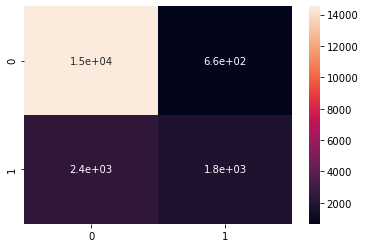

In [31]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test1["loan_status"], labels)
sns.heatmap(conf_matrix, annot=True)

In [32]:
mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(test1)
print(mis_rate)
print(accuracy_score(test1["loan_status"], labels))

0.15797617205632059
0.8420238279436794


In [33]:
print("Acc%:", accuracy_score(test1["loan_status"], labels))
print("F1:", f1_score(test1["loan_status"], labels))
print("LogLoss:", log_loss(test1["loan_status"], preds1))

Acc%: 0.8420238279436794
F1: 0.541123595505618
LogLoss: 0.3815409673410902


<h1>Part 4 - Are the Models Good?</h1>


<h2>Real Estate: Sale Price Linear Regression</h2>  

Based on the R square and RMSE values, the data model does not seem to accurately predict the sales price of real estate in NYC. Even with exploring and taking out attributes that are not important, the R square reman relatively the same. However, RMSE values did go down initially from over 1 million to only 358k. With that said, the dataset is not sufficient as the 40-50% is valued at 0 for zip code and year.

<h2>Credit Data: Loan Status Logistic Regression</h2>  

On the other hand, the logistic regression for our loan status seem to have a much better model than the real estate model. The baseline accuracy started at 78%. The model is at about 84% accuracy which is a 6% increase from our baseline.

As seen from the confusion matrix, the model predicted about 16,344 correcly (true positive + true negative). The model isn't perfect since there's a chance of 16% for incorrect prediction and an F score of 56%. Overall, I would say that this is model is good enough to start with but there's definitely room for improvements.